<a href="https://colab.research.google.com/github/saptaksubhra/Classification-ML-Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Final_Notebook_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting The Effectiveness of Bank Marketing Campaigns </u></b>

# Project Type: Classification Machine Learning Project

# Contribution: Individual

# Name: Saptaksubhra Bhattacharyya

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

# Main Objective: Increase The Effectiveness of The Bank's Telemarketing Campaign

This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans.

By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers.

# **Table of Contents**

1.Importing Necessary Libraries at the outset

2.Data Prepartion

* 2.1 Loading Dataset

3.Data Visualization

4.Correlation Matrix of Numerical Features

5.Conversion of Categorical Variables into Numerical

6.Implementation of Label Encoder ( OneHotEncoding )

7.Detection of Outliers

8.The Separation of Independent and Dependent Variable

9.Handling Imbalanced Dataset

* 9.1 Random Over-Sampling Technique

* 9.2 SMOTETomek Technique

* 9.3 Under Sampling Technique

10.Application of Different Classification Algorithms

* 10.1 Logistic Regression

* 10.2 Random Forest

* 10.3 K Nearest Neighbors

* 10.4  Decision Tree

* 10.5 SVM( Support Vector Machine)

* 10.6 Naive Bayes

* 10.7 XGBoost

11.Conclusion

# Approaches for The Classification Problem

# 1. Importing Necessary Libraries at the outset

Let's include the troop of soldiers first to embattle this war.

In [1]:
# Importing Required libraries at the outset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2. Data Prepartion:

# 2.1 Loading Dataset

In [2]:
# Mounting Google Drive to have access to the dataset of the Portuguese banking institution

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset of the Portuguese banking institution

df_PortugueseBank = pd.read_csv('/content/drive/MyDrive/Almabetter Capstone Projects-Saptaksubhra Bhattacharyya/Classification ML Project-Bank Marketing Effectiveness Prediction-Saptaksubhra Bhattacharyya/bank-full.csv', sep = ';')

In [4]:
# Bank dataset
df_PortugueseBank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# Let's see number of rows and number of columns in the dataset.

df_PortugueseBank.shape


(45211, 17)

In [6]:
# The whole of the dataset or general information of the dataset.

df_PortugueseBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Observations:

It is evident from the above dataset's information that

* there is no null value in the dataset
* ten columns are categorical and 
* seven columns are numerical

In [7]:
# Let's have a look at the Statistical description of the dataset.

df_PortugueseBank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Let's see if there is any missing value in the dataset itself.

df_PortugueseBank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

It is evident from the above observation that there is no missing value available in the dataset.

In [9]:
# Before going further into analysis, let's make a copy of the original dataset as per the statndard practice.

df_PortugueseBank_copy = df_PortugueseBank.copy()

# 3. Data Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


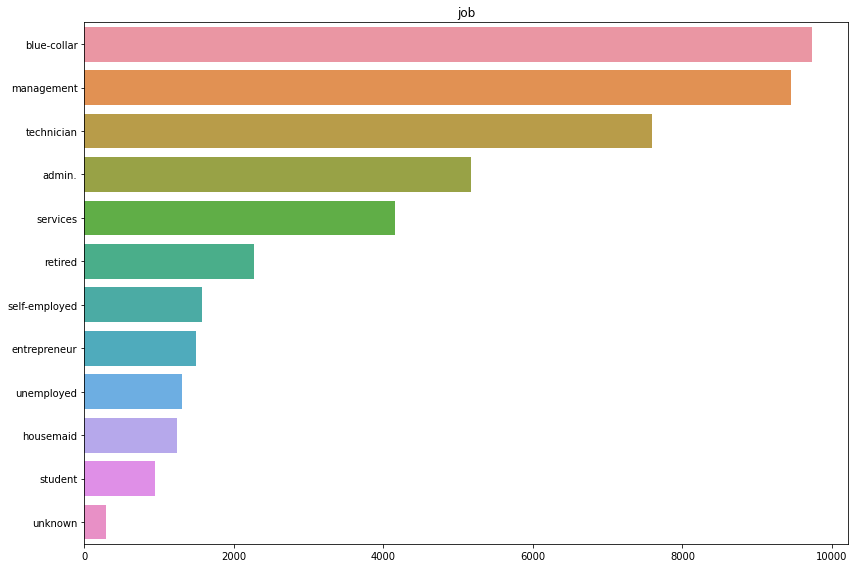

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


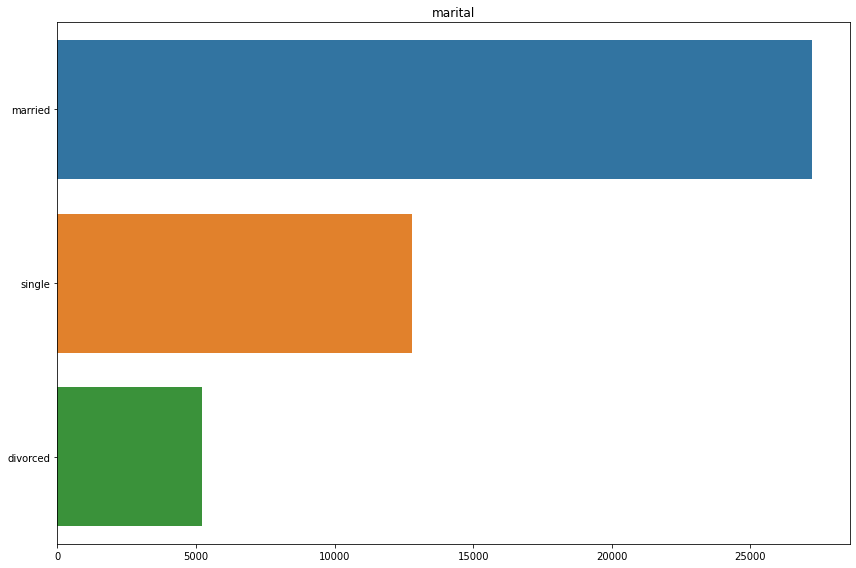

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


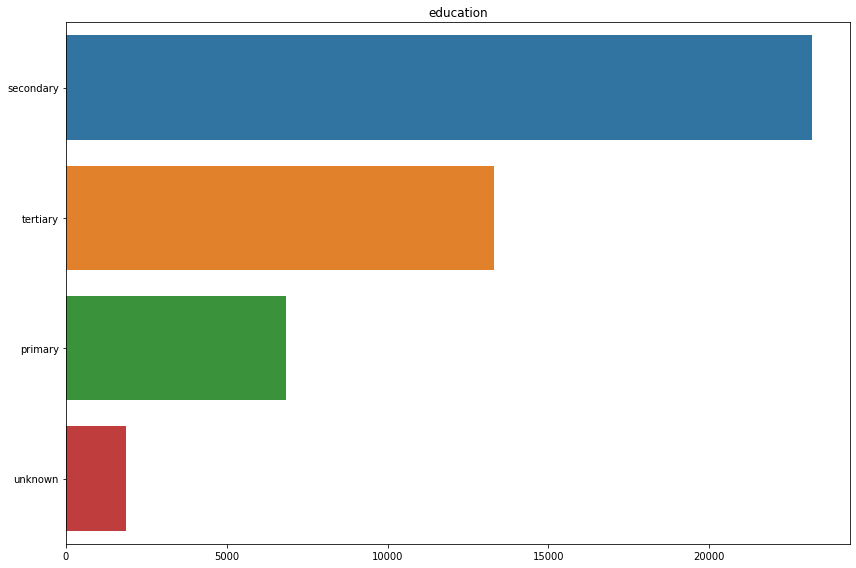

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


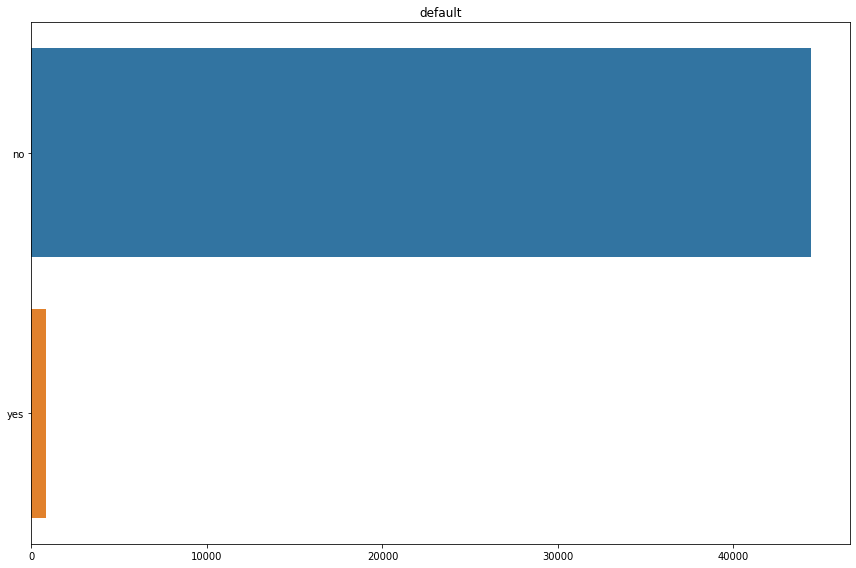

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


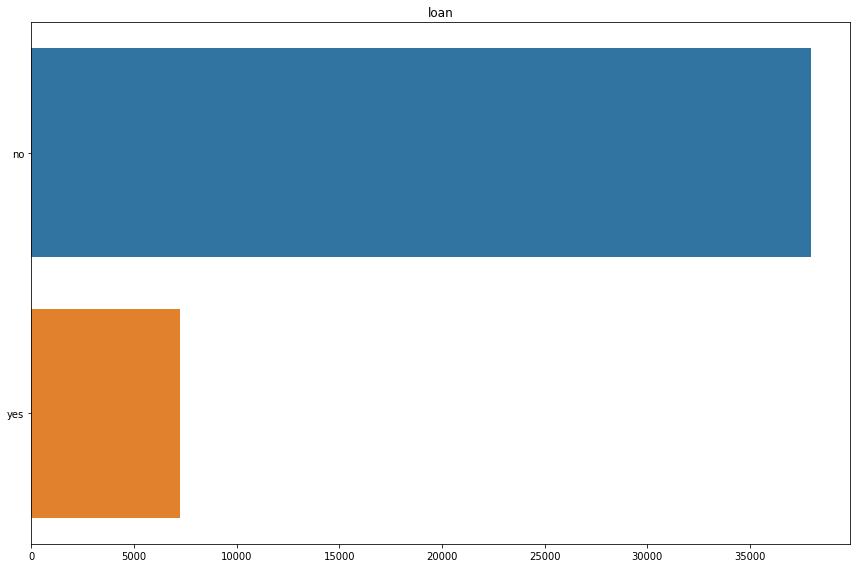

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


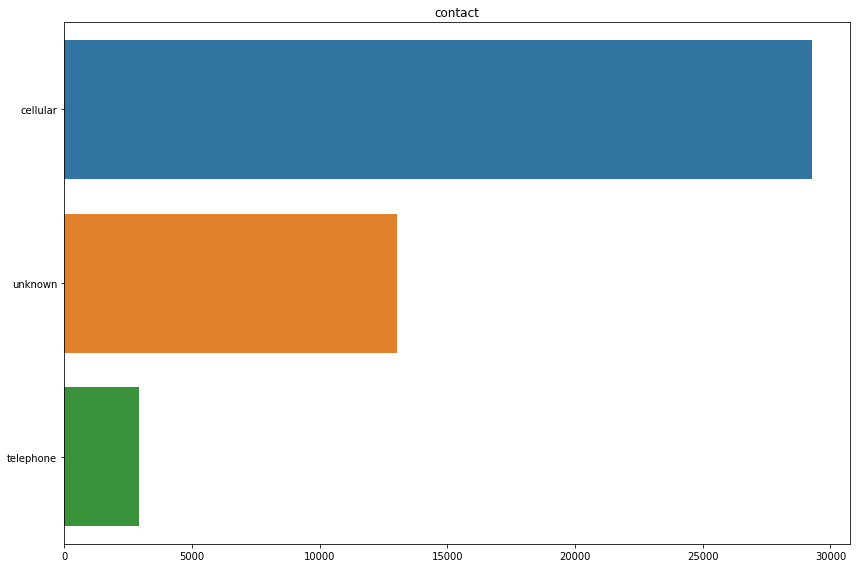

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


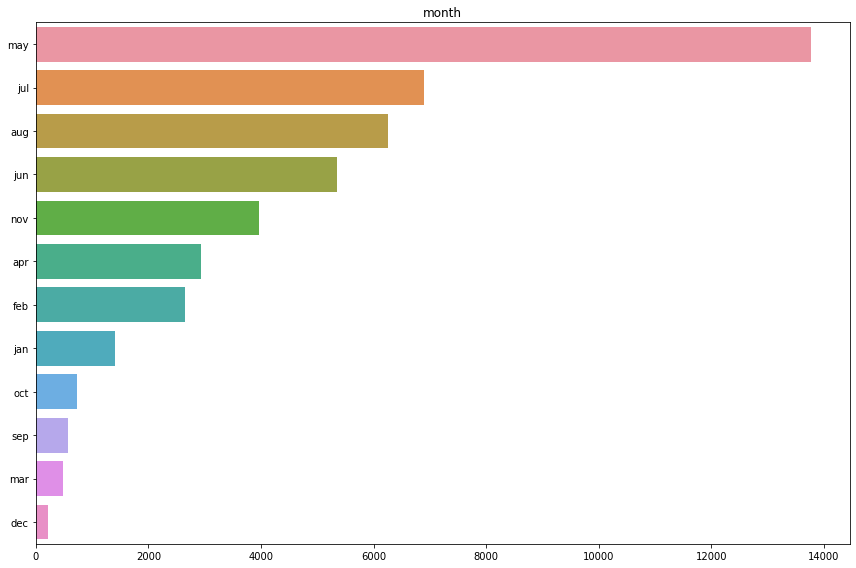

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


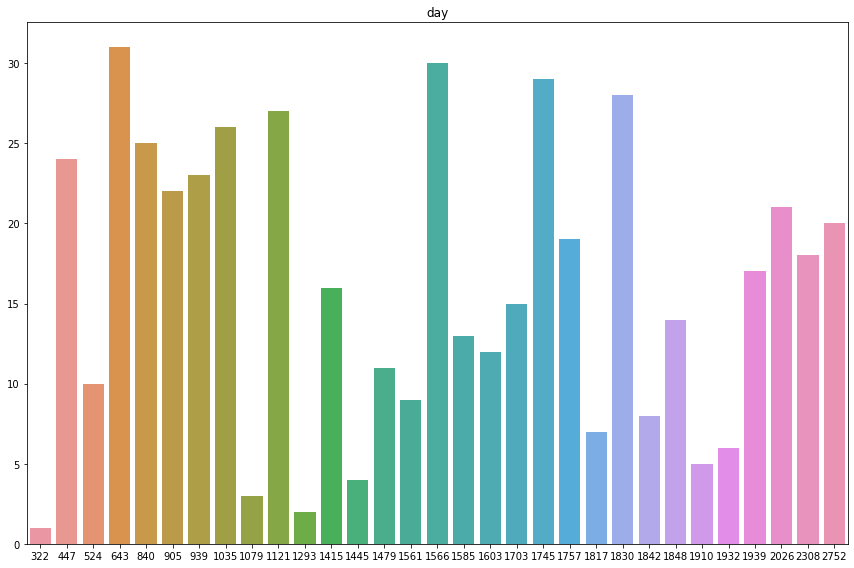

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


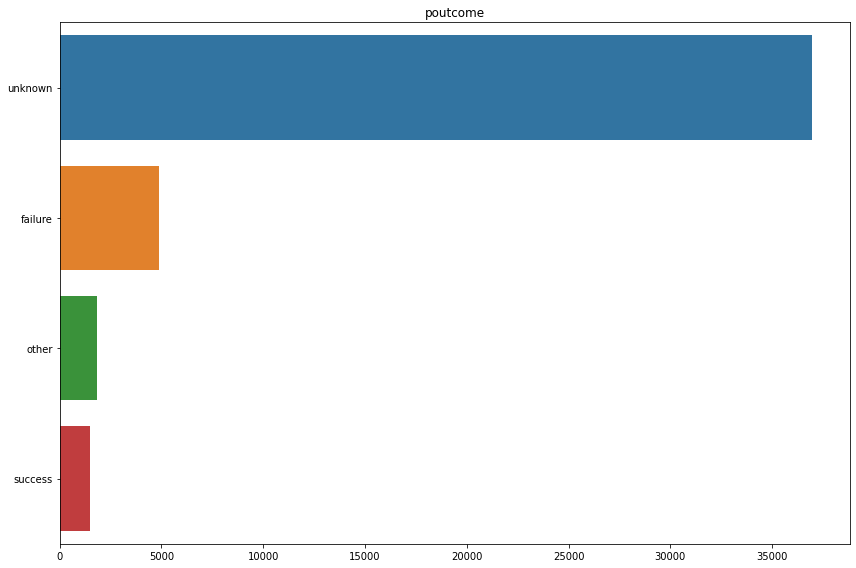

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


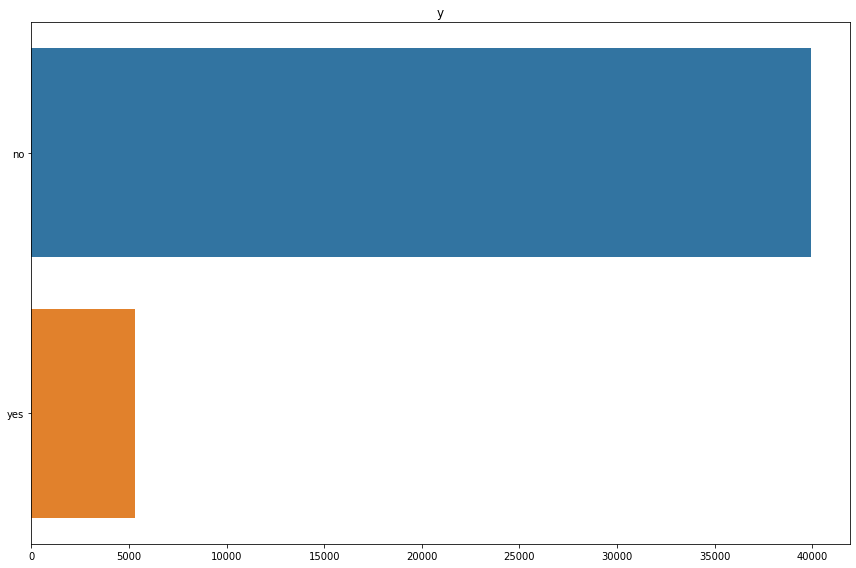

In [10]:
# Let's deep dive into categoreical variables in terms of data visualization of the dataset.

cat_vars = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome', 'y']

# Let's run the for loop to go through all the categorical variables to have a better visualization of each categorical variable.

for col in cat_vars:
  plt.figure(figsize = (12,8))
  sns.barplot(df_PortugueseBank_copy[col].value_counts().values, df_PortugueseBank_copy[col].value_counts().index)
  plt.title(col)
  plt.tight_layout()
  plt.show()

# Observations:

From above bar plots, it can be observed that

* There are 45211 rows and 17 columns.

* No missing values

* There are unknown values for many variables in the Data set.

* Variables with unknown/missing values are : 'education', 'job', 'housing', 'loan', 'deafult', and 'marital'.

# 4. Correlation Matrix of Numerical Features

In [11]:
# Converting the target variable 'y' into numerical feature
# Considering 'no' as 0 and 'yes' as 1.

df_PortugueseBank_copy.y = df_PortugueseBank_copy.y.map({'yes' : 1, 'no' : 0}).astype('uint8')

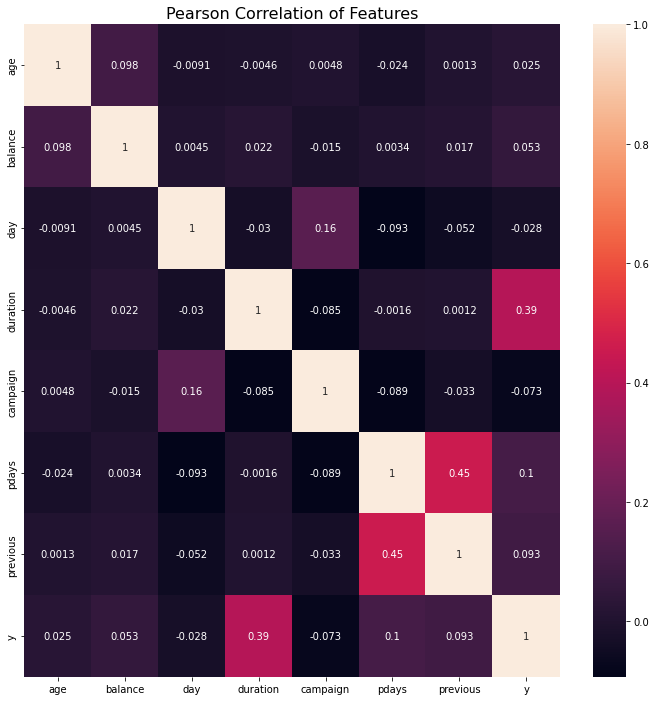

In [12]:
Correlation = df_PortugueseBank_copy.corr()

f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(Correlation, ax = ax, annot = True)
plt.title('Pearson Correlation of Features', size = 16)
plt.show()

It is crystal clear from the above corelation heatmap that the output feature 'y' is not highly correlated to any variable.

In [13]:
# Dropping off 'marital' and 'contact' columns as those two columns are of no use in the dataset itself.

df_PortugueseBank_copy.drop(['marital'], axis = 1, inplace = True)
df_PortugueseBank_copy.drop(['contact'], axis = 1, inplace = True)

In [14]:
# Let's see after dropping those two columns ("marital" and 'contact'), how the new dataset looks like.

df_PortugueseBank_copy.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,0
4,33,unknown,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,0


# 5. Conversion of Categorical Variables into Numerical

Now, we need to convert all categorical features into numerical for the sake of analysis.

In [15]:
# Converting 'yes' into '1' and 'no' into '0' for columns 'default', 'housing', 'loan' first.

df_PortugueseBank_copy[['default', 'housing', 'loan']] = df_PortugueseBank_copy[['default', 'housing', 'loan']].replace(['yes', 'no'], ['1', '0'])

In [16]:
# Column ' month' consists of 12 months as 'Jjan', 'feb', 'mar' up to 'dec'.
# Replacing 'jan', 'feb' and so on as '1', '2' respectively.


df_PortugueseBank_copy['month'] = df_PortugueseBank_copy['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
                                                                          ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])


In [17]:
# And lastly replacing 'unknown' with 'other as job category or designation in 'job' column as 'unknown' will not be handful meaning as far as further analysis is concerned.

df_PortugueseBank_copy['job'] = df_PortugueseBank_copy['job'].replace(['unknown'], ['other'])

In [18]:
# Now let's have a look the new form of the dataset fater so many replacements.

df_PortugueseBank_copy

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,0,2143,1,0,5,5,261,1,-1,0,unknown,0
1,44,technician,secondary,0,29,1,0,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,0,2,1,1,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,0,1506,1,0,5,5,92,1,-1,0,unknown,0
4,33,other,unknown,0,1,0,0,5,5,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,tertiary,0,825,0,0,17,11,977,3,-1,0,unknown,1
45207,71,retired,primary,0,1729,0,0,17,11,456,2,-1,0,unknown,1
45208,72,retired,secondary,0,5715,0,0,17,11,1127,5,184,3,success,1
45209,57,blue-collar,secondary,0,668,0,0,17,11,508,4,-1,0,unknown,0


# 6. Implementation of Label Encoder ( OneHotEncoding )

First of all, Lable Encoding will be applied on 'job', 'education', and 'poutcome' column as far as our data analysis is concerned.

In [19]:
# Applying Label Encoding on the above mentioned three columns.

from sklearn.preprocessing import LabelEncoder
Lab_Enco = LabelEncoder()
df_PortugueseBank_copy['job'] = Lab_Enco.fit_transform(df_PortugueseBank_copy['job'])
df_PortugueseBank_copy['education'] = Lab_Enco.fit_transform(df_PortugueseBank_copy['education'])
df_PortugueseBank_copy['poutcome'] = Lab_Enco.fit_transform(df_PortugueseBank_copy['poutcome'])

In [20]:
# The new dataset after the implementation of Label Encoding on the above mentioned three columns.

df_PortugueseBank_copy

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,10,2,0,825,0,0,17,11,977,3,-1,0,3,1
45207,71,6,0,0,1729,0,0,17,11,456,2,-1,0,3,1
45208,72,6,1,0,5715,0,0,17,11,1127,5,184,3,2,1
45209,57,1,1,0,668,0,0,17,11,508,4,-1,0,3,0


# 7. Detection of Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


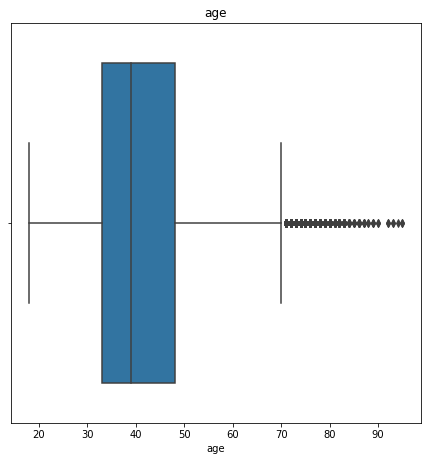

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


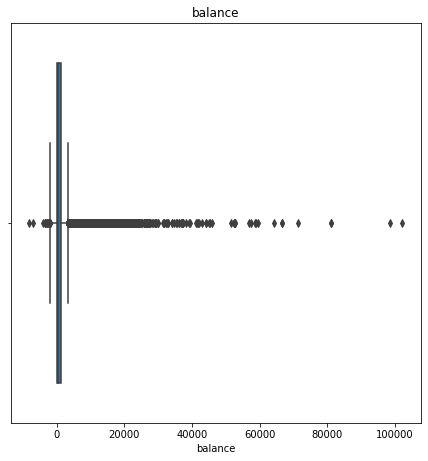

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


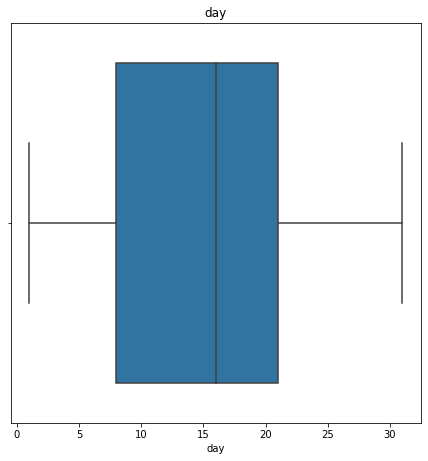

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


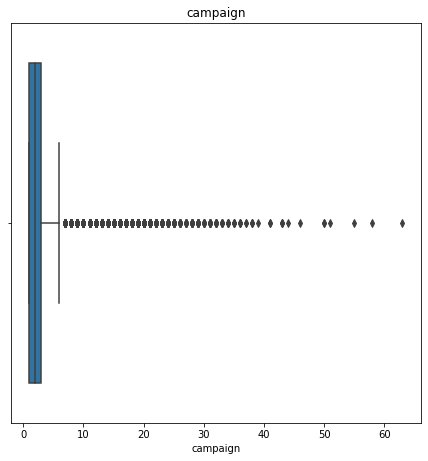

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


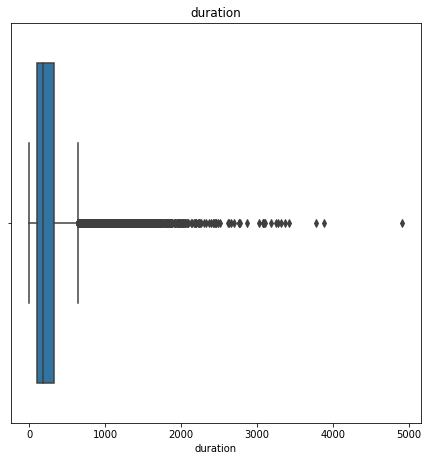

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


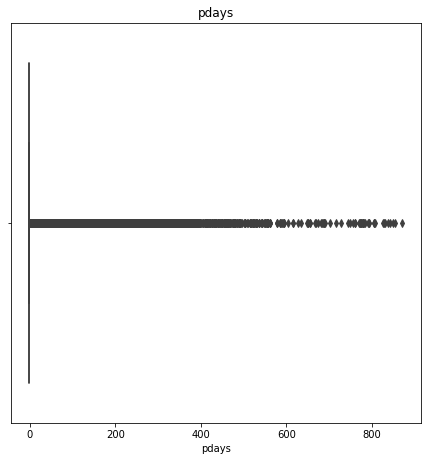

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


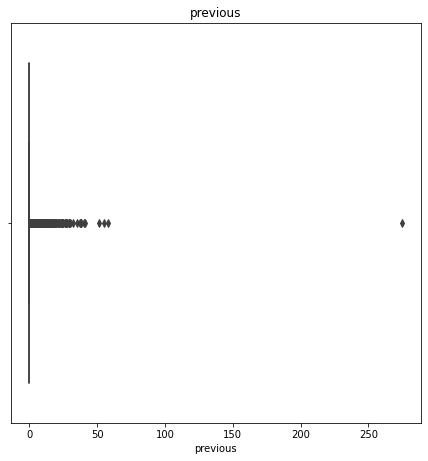

In [21]:
# Let's detect whether some outliers are available or not in the dataset.

try:

  columns = df_PortugueseBank_copy[['age','balance','day','campaign','duration','pdays','previous']]

  for column in columns:

   n = 0
   plt.figure(figsize = (25,25))
   plt.subplot(3,3,1)
   sns.boxplot(df_PortugueseBank_copy[column])
   plt.title(column)
   plt.show()
   n = n + 1
except:
  print('The Detection of Outliers')

From above boxplots, it is evident that outliers are existing in the dataset. Those outliers will have to be removed as far as the data cleaning is concerned because data cleaning will play a crucial role in providing a better accuracy of any model.

z-score is one of the methods by which outliers will be removed from dataset. Let's do it then.

In [22]:
# Let's implement z-score to remove outliers.

from scipy import stats
z = np.abs(stats.zscore(df_PortugueseBank_copy[['age','balance','day','campaign','duration','pdays','previous']]))
print(z)
df_PortugueseBank_copy = df_PortugueseBank_copy[(z < 3).all(axis = 1)]
df_PortugueseBank_copy.shape

            age   balance       day  campaign  duration     pdays  previous
0      1.606965  0.256419  1.298476  0.569351  0.011016  0.411453  0.251940
1      0.288529  0.437895  1.298476  0.569351  0.416127  0.411453  0.251940
2      0.747384  0.446762  1.298476  0.569351  0.707361  0.411453  0.251940
3      0.571051  0.047205  1.298476  0.569351  0.645231  0.411453  0.251940
4      0.747384  0.447091  1.298476  0.569351  0.233620  0.411453  0.251940
...         ...       ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  0.143418  0.076230  2.791329  0.411453  0.251940
45207  2.831227  0.120447  0.143418  0.246560  0.768224  0.411453  0.251940
45208  2.925401  1.429593  0.143418  0.721811  3.373797  1.436189  1.050473
45209  1.512791  0.228024  0.143418  0.399020  0.970146  0.411453  0.251940
45210  0.370689  0.528364  0.143418  0.246560  0.399328  1.476138  4.523577

[45211 rows x 7 columns]


(40209, 15)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


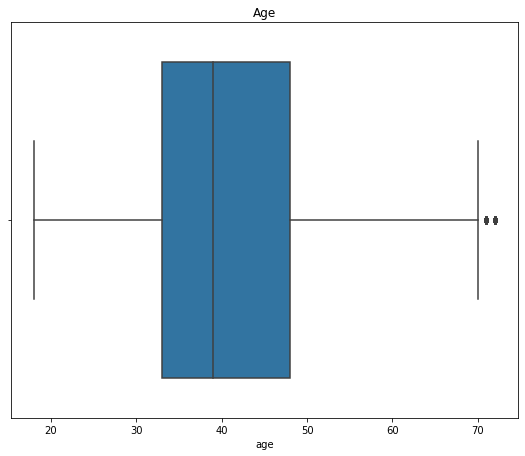

In [23]:
# Checking whether the outliers are removed or not in reality.

plt.figure(figsize = (20,16))
plt.subplot(2,2,1)
sns.boxplot(df_PortugueseBank_copy['age'])
plt.title('Age')
plt.show()

It seems that the outliers have been outcast of the boxplot society.

# 8. The Separation of Independent and Dependent Variable

In [27]:
# Defining x and y axis as independent and dependent variable respectively.

x = df_PortugueseBank_copy.drop(['y'], axis = 1) # Dropping off 'y' column as it is the dependent variable and the rest all independent variables are existing.

y = df_PortugueseBank_copy['y'] # As 'y' being the dependent or outpouyt varaiable in the dataset.

df_PortugueseBank_copy['y'].value_counts()

0    36155
1     4054
Name: y, dtype: int64

# 9. Handling Imbalanced Dataset

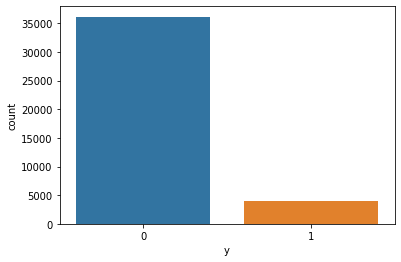

In [28]:
# By using countplot, imbalanced dataset will be handled.

sns.countplot(x = 'y', data = df_PortugueseBank_copy)

The definition of imbalanced data says that when observation in one class is higher than in other classes then it can be said that there exists a class imbalance. And it is not obscure from the above graph that there exists a huge difference between the dataset.

To sort out this issue, re-sampling technique will be utilised.

# 9.1 Random Over-Sampling Technique

This technique can be defined as adding more copies to the minority class.

In [29]:
# Let's implement Random Over-Sampling technique first to handle imbalanced dataset.

from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()
x_new, y_new = os.fit_resample(x,y)

The shape of the original dataset is :  Counter({0: 36155, 1: 4054})
The shape of the resampled dataset is :  Counter({0: 36155, 1: 36155})


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


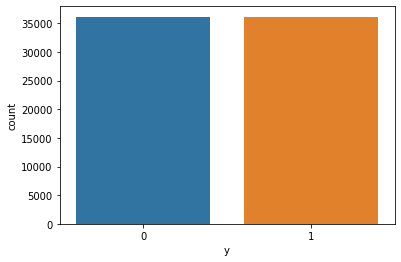

In [30]:
from collections import Counter
print('The shape of the original dataset is :  {}'.format(Counter(y)))
print('The shape of the resampled dataset is :  {}'.format(Counter(y_new)))
sns.countplot(y_new)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Dividing the dataset into training and testing part.
Xtrain, Xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size = 0.30, random_state = 0)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)


(50617, 14) (21693, 14) (50617,) (21693,)


# Random Forest Classifier

ROC AUC Score:  0.9743859412290318
[[10217    11]
 [  575 10890]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     10228
           1       1.00      0.95      0.97     11465

    accuracy                           0.97     21693
   macro avg       0.97      0.97      0.97     21693
weighted avg       0.97      0.97      0.97     21693



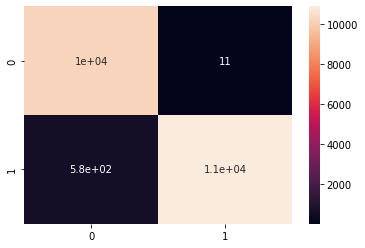

In [32]:
# Implementation of Random Forest Classifier

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
# Importing Random Forest Classifier from sklearn.
from sklearn.ensemble import RandomForestClassifier
randomforestclassifier = RandomForestClassifier()
randomforestclassifier.fit(Xtrain, ytrain)
y_pred = randomforestclassifier.predict(Xtest)

ROCAUC_rf = roc_auc_score(y_pred, ytest)
precision_rf = precision_score(y_pred, ytest)
recall_rf = recall_score(y_pred, ytest)
accuracy_rf = accuracy_score(y_pred, ytest)
f1score_rf = f1_score(y_pred, ytest)
print('ROC AUC Score: ', ROCAUC_rf)

cm = confusion_matrix(y_pred, ytest)
print(cm)

sns.heatmap(cm, annot = True)

# Printing the classification report 
print(classification_report(y_pred, ytest))


# 9.2 SMOTETomek Technique

In [33]:
from imblearn.combine import SMOTETomek
os1 = SMOTETomek(0.75)
x_new, y_new = os1.fit_resample(x,y)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

# Dividing the dataset into training and testing
Xtrain, Xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size = 0.30, random_state = 0)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

#Featrure Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)


/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


(43194, 14) (18513, 14) (43194,) (18513,)


ROC AUC Score:  0.9391243332780097
[[9933  513]
 [ 586 7481]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10446
           1       0.94      0.93      0.93      8067

    accuracy                           0.94     18513
   macro avg       0.94      0.94      0.94     18513
weighted avg       0.94      0.94      0.94     18513



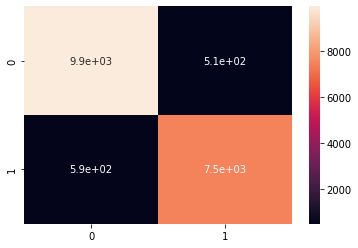

In [34]:
# Implementing Random Forest algorithm in SMOTE analysis
from sklearn.ensemble import RandomForestClassifier
randomforestclassifier = RandomForestClassifier()
randomforestclassifier.fit(Xtrain, ytrain)
y_pred = randomforestclassifier.predict(Xtest)

ROCAUC_rf = roc_auc_score(y_pred, ytest)
precision_rf = precision_score(y_pred, ytest)
recall_rf = recall_score(y_pred, ytest)
accuracy_rf = accuracy_score(y_pred, ytest)
f1score_rf = f1_score(y_pred, ytest)
print('ROC AUC Score: ', ROCAUC_rf)

cm = confusion_matrix(y_pred, ytest)
print(cm)

sns.heatmap(cm, annot = True)

# Printing the classification report
print(classification_report(y_pred, ytest))


# 9.3 Under Sampling Technique

In [35]:
from imblearn.under_sampling import NearMiss
os2 = NearMiss(0.7)
x_new, y_new = os2.fit_resample(x,y)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

# Dividing the dataset into training and testing part
Xtrain, Xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size = 0.30, random_state = 0)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


(6891, 14) (2954, 14) (6891,) (2954,)


ROC AUC Score:  0.902125251235316
[[1635  180]
 [ 110 1029]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1815
           1       0.85      0.90      0.88      1139

    accuracy                           0.90      2954
   macro avg       0.89      0.90      0.90      2954
weighted avg       0.90      0.90      0.90      2954



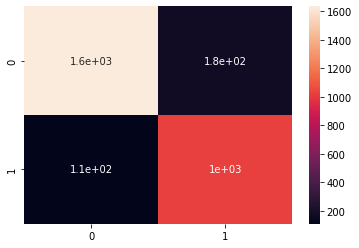

In [36]:
# Implementing Random Forest algorithm in case of Under Sampling

from sklearn.ensemble import RandomForestClassifier
randomforestclassifier = RandomForestClassifier()
randomforestclassifier.fit(Xtrain, ytrain)
y_pred = randomforestclassifier.predict(Xtest)

ROCAUC_rf = roc_auc_score(y_pred, ytest)
precision_rf = precision_score(y_pred, ytest)
recall_rf = recall_score(y_pred, ytest)
accuracy_rf = accuracy_score(y_pred, ytest)
f1score_rf = f1_score(y_pred, ytest)
print('ROC AUC Score: ', ROCAUC_rf)

cm = confusion_matrix(y_pred, ytest)
print(cm)

sns.heatmap(cm, annot = True)

# Printing the classification report
print(classification_report(y_pred, ytest))

# 10. Application of Different Classification Algorithms

Now, let's apply different classification algorithms for the analysis of the banking dataset to see which algorithm provides the best accuracy. I am going to implement Logistic Regression, Random Forest, K Nearest Neighbors, Decision Tree, SVM, Naive Bayes, XGBoost to see which algoirtm gives the best accuracy as far as the datanalysis of the banking dataset is concerned.

# 10.1 Logistic Regression

Train Score : 

0.8757800029023364
*********************************
ROC AUC score :  0.8741496598639455
[[1615  247]
 [ 130  962]]
Test Score : 

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1862
           1       0.80      0.88      0.84      1092

    accuracy                           0.87      2954
   macro avg       0.86      0.87      0.87      2954
weighted avg       0.88      0.87      0.87      2954



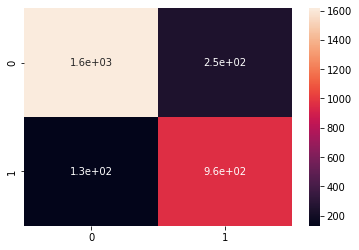

In [38]:
# Let's see how much accuracy Logistic Regression provides.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

logisticmodel = LogisticRegression()
logisticmodel.fit(Xtrain, ytrain)
y_pred = logisticmodel.predict(Xtest)

precision_lr = precision_score(y_pred, ytest)
recall_lr = recall_score(y_pred, ytest)
accuracy_lr = accuracy_score(y_pred, ytest)
f1score_lr = f1_score(y_pred, ytest)
ROCAUC_lr = roc_auc_score(y_pred, ytest)

print('Train Score : \n')
print(logisticmodel.score(Xtrain, ytrain))

print('*********************************')

print('ROC-AUC score : ', ROCAUC_lr)

cm = confusion_matrix(y_pred, ytest)
print(cm)
sns.heatmap(cm, annot = True)

print('Test Score : \n')
print(classification_report(y_pred, ytest))

# 10.2 Random Forest

Train Score : 

1.0
*********************************
ROC AUC score :  0.9064337596105552
[[1639  171]
 [ 106 1038]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1810
           1       0.86      0.91      0.88      1144

    accuracy                           0.91      2954
   macro avg       0.90      0.91      0.90      2954
weighted avg       0.91      0.91      0.91      2954



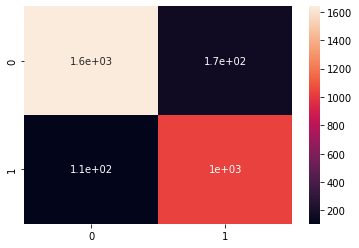

In [39]:
# Let's see how much accuracy Random Forest algorithm provides.

from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(Xtrain, ytrain)
y_pred = randomforest.predict(Xtest)

precision_rf = precision_score(y_pred, ytest)
recall_rf = recall_score(y_pred, ytest)
accuracy_rf = accuracy_score(y_pred, ytest)
f1score_rf = f1_score(y_pred, ytest)
ROCAUC_rf = roc_auc_score(y_pred, ytest)

print('Train Score : \n')
print(randomforest.score(Xtrain, ytrain))

print('*********************************')

print('ROC-AUC score : ', ROCAUC_rf)

cm = confusion_matrix(y_pred, ytest)
print(cm)
sns.heatmap(cm, annot = True)

print(classification_report(y_pred, ytest))

# 10.3 K Nearest Neighbors

Train Score : 

0.9032070817007691
*********************************
ROC AUC score :  0.8621741013862024
[[1621  299]
 [ 124  910]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1920
           1       0.75      0.88      0.81      1034

    accuracy                           0.86      2954
   macro avg       0.84      0.86      0.85      2954
weighted avg       0.87      0.86      0.86      2954



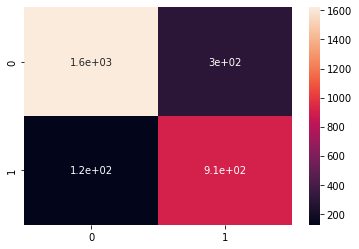

In [40]:
# Let's see how much accuracy K Nearest Neighbors algorithm provides.

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
y_pred = knn.predict(Xtest)

precision_knn = precision_score(y_pred, ytest)
recall_knn = recall_score(y_pred, ytest)
accuracy_knn = accuracy_score(y_pred, ytest)
f1score_knn = f1_score(y_pred, ytest)
ROCAUC_knn = roc_auc_score(y_pred, ytest)

print('Train Score : \n')
print(knn.score(Xtrain, ytrain))

print('*********************************')

print('ROC-AUC score : ', ROCAUC_knn)

cm = confusion_matrix(y_pred, ytest)
print(cm)
sns.heatmap(cm, annot = True)

print(classification_report(y_pred, ytest))

# 10.4 Decision Tree

Train Score : 

1.0
*********************************
ROC AUC score :  0.8650082800365464
[[1559  201]
 [ 186 1008]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1760
           1       0.83      0.84      0.84      1194

    accuracy                           0.87      2954
   macro avg       0.86      0.87      0.86      2954
weighted avg       0.87      0.87      0.87      2954



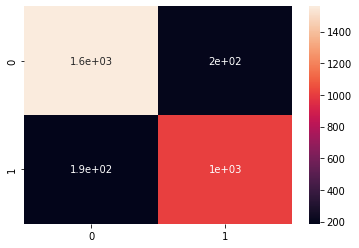

In [41]:
# Now let's have a look how much accuracy can be provided by Decision Tree algorithm.

from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(Xtrain, ytrain)
y_pred = decisiontree.predict(Xtest)

precision_dt = precision_score(y_pred, ytest)
recall_dt = recall_score(y_pred, ytest)
accuracy_dt = accuracy_score(y_pred, ytest)
f1score_dt = f1_score(y_pred, ytest)
ROCAUC_dt = roc_auc_score(y_pred, ytest)

print('Train Score : \n')
print(decisiontree.score(Xtrain, ytrain))

print('*********************************')

print('ROC-AUC score : ', ROCAUC_dt)

cm = confusion_matrix(y_pred, ytest)
print(cm)
sns.heatmap(cm, annot = True)

print(classification_report(y_pred, ytest))


# 10.5 SVM( Support Vector Machine)

Train Score : 

0.9010303294151792
*********************************
ROC AUC score :  0.8885819683015802
[[1627  215]
 [ 118  994]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1842
           1       0.82      0.89      0.86      1112

    accuracy                           0.89      2954
   macro avg       0.88      0.89      0.88      2954
weighted avg       0.89      0.89      0.89      2954



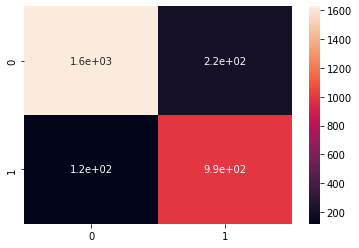

In [51]:
# Now, it's the time to apply Supprt Vector Machine algorithm. Let's see how it goes.

from sklearn.svm import SVC

SVM = SVC(probability = True)
SVM.fit(Xtrain, ytrain)
y_pred = SVM.predict(Xtest)

precision_SVM = precision_score(y_pred, ytest)
recall_SVM = recall_score(y_pred, ytest)
accuracy_SVM = accuracy_score(y_pred, ytest)
f1score_SVM = f1_score(y_pred, ytest)
ROCAUC_SVM = roc_auc_score(y_pred, ytest)

print('Train Score : \n')
print(SVM.score(Xtrain, ytrain))

print('*********************************')

print('ROC-AUC score : ', ROCAUC_SVM)

cm = confusion_matrix(y_pred, ytest)
print(cm)
sns.heatmap(cm, annot = True)

print(classification_report(y_pred, ytest))


# 10.6 Naive Bayes

Train Score : 

0.8415324336090553
*********************************
ROC AUC score :  0.876972342820112
[[1709  432]
 [  36  777]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2141
           1       0.64      0.96      0.77       813

    accuracy                           0.84      2954
   macro avg       0.81      0.88      0.82      2954
weighted avg       0.89      0.84      0.85      2954



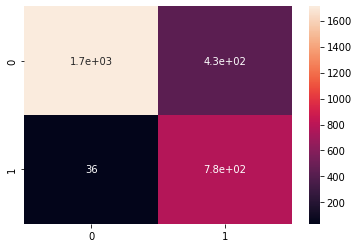

In [43]:
# Now Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(Xtrain, ytrain)
y_pred = nb.predict(Xtest)

precision_nb = precision_score(y_pred, ytest)
recall_nb = recall_score(y_pred, ytest)
accuracy_nb = accuracy_score(y_pred, ytest)
f1score_nb = f1_score(y_pred, ytest)
ROCAUC_nb = roc_auc_score(y_pred, ytest)

print('Train Score : \n')
print(nb.score(Xtrain, ytrain))

print('*********************************')

print('ROC-AUC score : ', ROCAUC_nb)

cm = confusion_matrix(y_pred, ytest)
print(cm)
sns.heatmap(cm, annot = True)

print(classification_report(y_pred, ytest))

# 10.7 XGBoost

Train Score : 

0.921346684080685
*********************************
ROC AUC score :  0.9026848107345946
[[1637  181]
 [ 108 1028]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1818
           1       0.85      0.90      0.88      1136

    accuracy                           0.90      2954
   macro avg       0.89      0.90      0.90      2954
weighted avg       0.90      0.90      0.90      2954



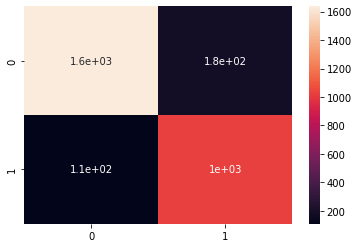

In [44]:
# Now XGBOOst classifier algorithm

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(Xtrain, ytrain)
y_pred = xgb.predict(Xtest)

precision_xgb = precision_score(y_pred, ytest)
recall_xgb = recall_score(y_pred, ytest)
accuracy_xgb = accuracy_score(y_pred, ytest)
f1score_xgb = f1_score(y_pred, ytest)
ROCAUC_xgb = roc_auc_score(y_pred, ytest)

print('Train Score : \n')
print(xgb.score(Xtrain, ytrain))

print('*********************************')

print('ROC-AUC score : ', ROCAUC_xgb)

cm = confusion_matrix(y_pred, ytest)
print(cm)
sns.heatmap(cm, annot = True)

print(classification_report(y_pred, ytest))

# 11. Feature Importance For Prediction

In [45]:
# Importing necessary library for feature importance
from sklearn.metrics import roc_curve, roc_auc_score

# 11.1 Probabilities of Prediction

In [52]:
logreg_prob = logisticmodel.predict_proba(Xtest)
rf_prob = randomforest.predict_proba(Xtest)
knn_prob = knn.predict_proba(Xtest)
dt_prob = decisiontree.predict_proba(Xtest)
svm_prob = SVM.predict_proba(Xtest)
nb_prob = nb.predict_proba(Xtest)
xgb_prob = xgb.predict_proba(Xtest)

In [53]:
logreg_prob = logreg_prob[:, 1]
rf_prob = rf_prob[:, 1]
knn_prob = knn_prob[:, 1]
dt_prob = dt_prob[:, 1]
svm_prob = svm_prob[:, 1]
nb_prob = nb_prob[:, 1]
xgb_prob = xgb_prob[:, 1]

# 11.2 Computation of ROC-AUC and ROC Curve Values

ROC is the receiver operating characteristic AUROC is the area under the ROC curve.

In [54]:
logreg_roc_auc = roc_auc_score(ytest, logreg_prob)
rf_roc_auc = roc_auc_score(ytest, rf_prob)
knn_roc_auc = roc_auc_score(ytest, knn_prob)
dt_roc_auc = roc_auc_score(ytest, dt_prob)
svm_roc_auc = roc_auc_score(ytest, svm_prob)
nb_roc_auc = roc_auc_score(ytest, nb_prob)
xgb_roc_auc = roc_auc_score(ytest, xgb_prob)

In [55]:
# Printing ROC-AUC scores
print('ROC-AUC score of Logistic Regression is : %0.2f' %(logreg_roc_auc))
print('ROC-AUC score of Random Forest is : %0.2f' %(rf_roc_auc))
print('ROC-AUC score of k-Nearest Neighbors is : %0.2f' %(knn_roc_auc))
print('ROC-AUC score of Decision Tree is : %0.2f' %(dt_roc_auc))
print('ROC-AUC score of Support Vector Machine is : %0.2f' %(svm_roc_auc))
print('ROC-AUC score of Naive Bayes is : %0.2f' %(nb_roc_auc))
print('ROC-AUC score of XGBoost is : %0.2f' %(xgb_roc_auc))

ROC-AUC score of Logistic Regression is : 0.94
ROC-AUC score of Random Forest is : 0.97
ROC-AUC score of k-Nearest Neighbors is : 0.91
ROC-AUC score of Decision Tree is : 0.86
ROC-AUC score of Support Vector Machine is : 0.95
ROC-AUC score of Naive Bayes is : 0.93
ROC-AUC score of XGBoost is : 0.97


# 12. Conclusion:

